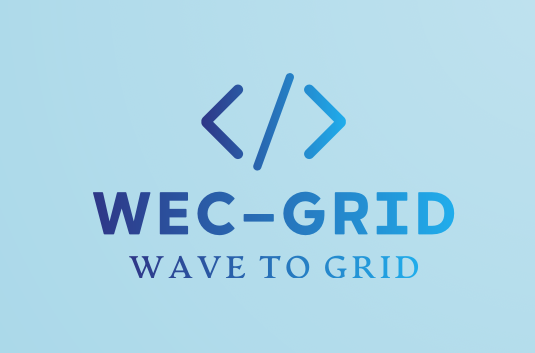

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center>PNNL Demonstration</center></h2>

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">
WEC-Grid is a software platform that is being developed to enable grid operators to integrate wave energy converters (WECs) onto their grids easily. The primary focus of the platform is currently on microgrids, but it has been designed with scalability in mind. Our goal is to create an open-source tool that simplifies the integration of WECs and eliminates many of the challenges associated with setting up an SQL database and coordinating models operating at different temporal resolutions. By abstracting away much of the setup and backend work, we hope for operators and researchers to incorporate WECs into their systems. The code below is a demonstration of the software current abilities
</span> 
</span>
</p>

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center>Enviroment</center></h2>

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">
Currently, our project uses Jupyter Notebooks and Anaconda to interact with and manage WEC-Grid. These platforms are widely supported by both publishers and the community. In particular, Jupyter Notebook greatly simplifies the process of interacting with WEC-Grid. Its live cell format enables quick analysis and running of smaller scripts, making it a highly efficient tool for our needs.
</span> 
</span>
</p>

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center>Initalization of a WEC-Grid</center></h2>`

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">

</span> 
</span>
</p>

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">
The cell below is the "Import" cell. In this cell we import all the needed packages and in particular the WEC-Grid package. This simple import initalizes the PSSe connection for us.
</span> 
</span>
</p>

In [2]:
import os, sys
sys.path.append('../wec-grid-code') # add to Python Path
import wec_grid_class as wg # import our program
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:72% !important; }</style>"))

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)


Notes: Intergrate with PNNL cost modeling (Transmission & disb) --- Warm start from production cost to powerflow --- HOMER cost function

In [4]:
case24 = r"../input_files/RTS96DYN/IEEE_24_bus.RAW" # IEEE RTS 96 - 24 bus case

In [5]:
wec_buses = [21, 22, 23]

In [6]:
WecObj = wg.Wec_grid(case24) # initialize Object.. reads file ... finds a steady state
WecObj.initalize_psse("fnsl")


 Input error detected at !
 -m ipykernel_launcher --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 "--Session.signature_scheme=\"hmac-sha256\"" "--Session.key=b\"73da158f-c405-41bb-ba91-3999391c2992\"" --shell=9002 "--transport=\"tcp\"" --iopu
                                                                                                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2023
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.

 Could not find entry point runpy_add_to_sys_path

           SIEMENS POW

In [5]:
WecObj.psse_dataframe # lets take a look at the data

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,138.0,1.000000,0.000000,3,35.930069,180.488586,NaN,NaN,35.930069,180.488586
1,2,BUS 2,138.0,0.997822,0.010373,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000
2,3,BUS 3,138.0,0.863703,10.755864,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000
3,4,BUS 4,138.0,0.887014,-0.415208,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001
4,5,BUS 5,138.0,0.927217,-0.229420,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000
5,6,BUS 6,138.0,0.907952,0.391817,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000
6,7,BUS 7,138.0,0.796234,-0.580059,2,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000
7,8,BUS 8,230.0,0.805368,-0.868408,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000
8,9,BUS 9,138.0,0.834940,4.989085,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000
9,10,BUS 10,138.0,0.881702,3.723669,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000


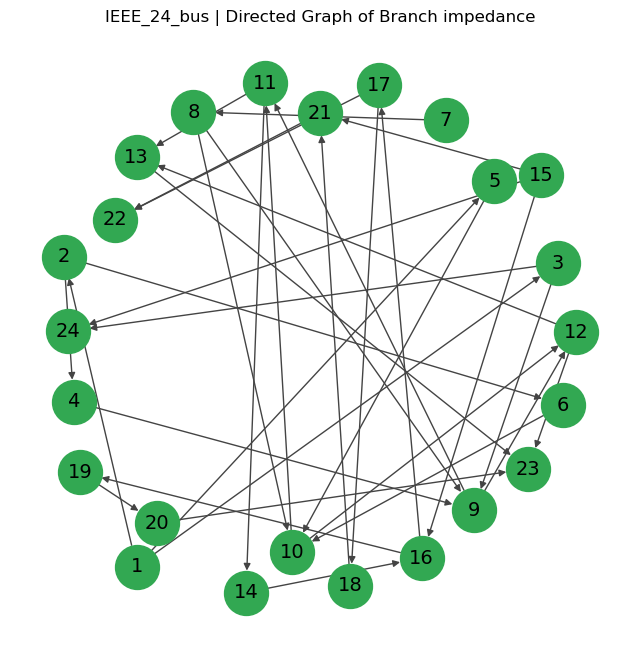

In [6]:
WecObj._psse_viz() # function call

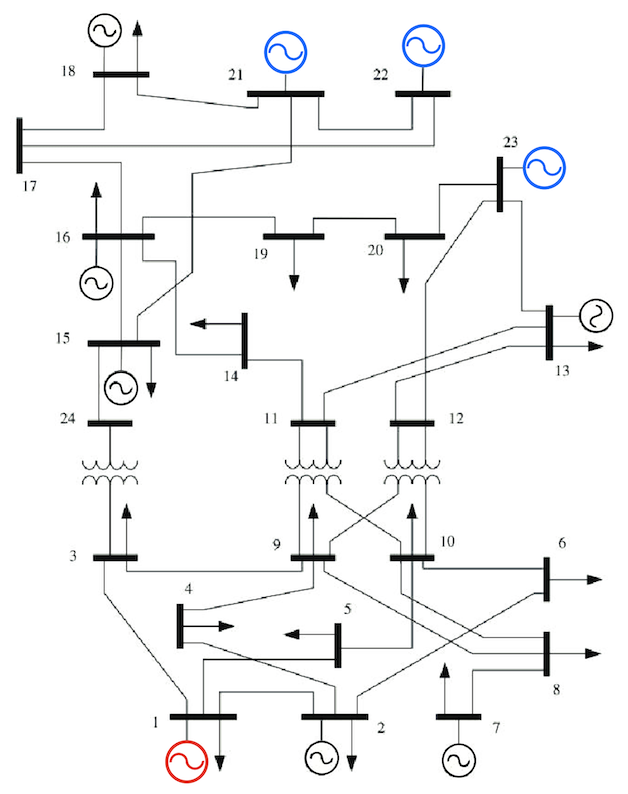

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center>WEC-Sim </center></h2>

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">
For this demonstration well be using a modified RM3 with WEC-PTO to extract electrical output. To the right we can see an example of the RM3 from WEC-SIM. x3 speed.
</span> 
</span>
</p>

<p style="line-height:1.5">
    <span style="font-family: Times">
    <span style="font-size:16pt">
WEC-Grid has a function call which connects to MATLAB via a Python engine to run the WEC models. This API call is much more efficent and abstracts away the WEC-Sim steps. below is an example. We can pass the usual simulation variables such as Wave height and Wave period. Once the simulation is compelte we call a MATLAB scripts to process and populate the SQLite database. Here's an example of the WEC-Sim run call.
</span> 
</span>
</p>

```python 
    WecObj.run_WEC_Sim(wec_id = id, 
                   sim_length = (24*60*60), # 6 hours 
                   Tsample = 300, # 5 mins 
                   waveHeight = 2.5, 
                   wavePeriod = 8, 
                   waveSeed = np.random.randint(999999999)
                  )

```


In [15]:
for i in range(1,4):
    WecObj.run_WEC_Sim(wec_id = i, 
                   sim_length = (60*60*2), # 2 hours 
                   Tsample = 300, # 5 mins 
                   waveHeight = 2.5, 
                   wavePeriod = 8, 
                   waveSeed = np.random.randint(999999999)
                  )

Matlab Engine estbalished
calling W2G
displaying simulation plots
calling PSSe formatting
sim complete
Matlab Engine estbalished
calling W2G
displaying simulation plots
calling PSSe formatting
sim complete
Matlab Engine estbalished
calling W2G
displaying simulation plots
calling PSSe formatting
sim complete


In [3]:
HTML("""
<center>
    <video width="500" height="500" controls>
      <source src="../input_files/videos/short_RM3.mov" type="video/mp4">
    </video>
</center>
""")

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center>WEC Output / SQLite Database</center></h2>

    
<p style="line-height:1.5">
<span style="font-family: Times">
<span style="font-size:16pt">
For this demostration we'll be focusing on AC injection. The Values which will be updated are the Activate Power (P) and Voltage Magitude in PU (V). So we can go ahead and pull that data from the SQL database.
</span> 
</span>
</p>

In [10]:
WecObj.pull_wec_data()

OperationalError: unable to open database file

In [7]:
# connect and pull data from SQL database


In [7]:
WecObj.wec_list = wec_buses
WecObj.pull_wec_data()

In [11]:
WecObj.wec_data[21]

,time,ibus,pg,vs,pt,pb,qt,qb
0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000
1,450.0,1.0,15.196167,1.1,15.196167,0.0,57.942464,-57.942464
2,750.0,1.0,19.828722,1.1,19.828722,0.0,56.606665,-56.606665
3,1050.0,1.0,19.898503,1.1,19.898503,0.0,56.541102,-56.541102
4,1350.0,1.0,19.723636,1.1,19.723636,0.0,56.622819,-56.622819
5,1650.0,1.0,15.675579,1.1,15.675579,0.0,57.879307,-57.879307
6,1950.0,1.0,15.746523,1.1,15.746523,0.0,57.864698,-57.864698
7,2250.0,1.0,18.438301,1.1,18.438301,0.0,57.085421,-57.085421
8,2550.0,1.0,20.040847,1.1,20.040847,0.0,56.530718,-56.530718
9,2850.0,1.0,18.433727,1.1,18.433727,0.0,57.052999,-57.052999


In [13]:
WecObj.wec_data[21].loc[WecObj.wec_data[21].time == 450.0].pg

1    15.196167
Name: pg, dtype: float64

In [8]:
WecObj._psse_ac_injection(0, 10650.0)


 Power flow data changed for machine "1" at bus 21 [21          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    294.000         0.00000      PG

 Power flow data changed for bus 21 [21          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.911253         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         4.6851(     21     )   11.5706(     21     )
                                                             0.35612(     13     )   0.77630(     21     )
   1         1.6998(     21     )    2.0024(     18     )
                                                             0.12671(     24     )   0.21414(     21     )
   2         0.2849(     16     )    0.2095(     15     )
                                                             0.05753(      7     )   0.06332(     21     )
   3         0.0440(     16     )    0.0150(     16     )
                                                     

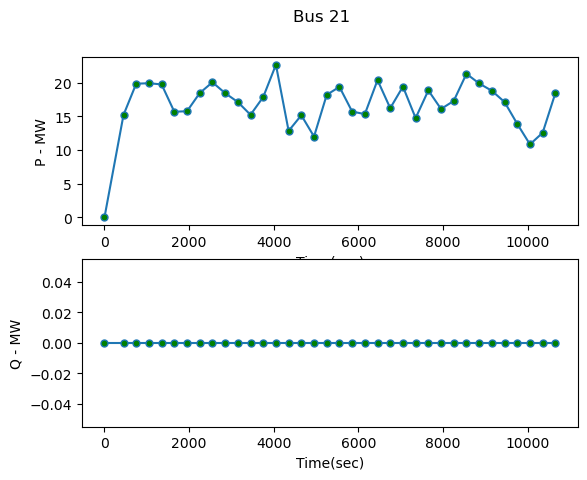

In [14]:
WecObj._psse_plot_bus(21, [0, 10650])

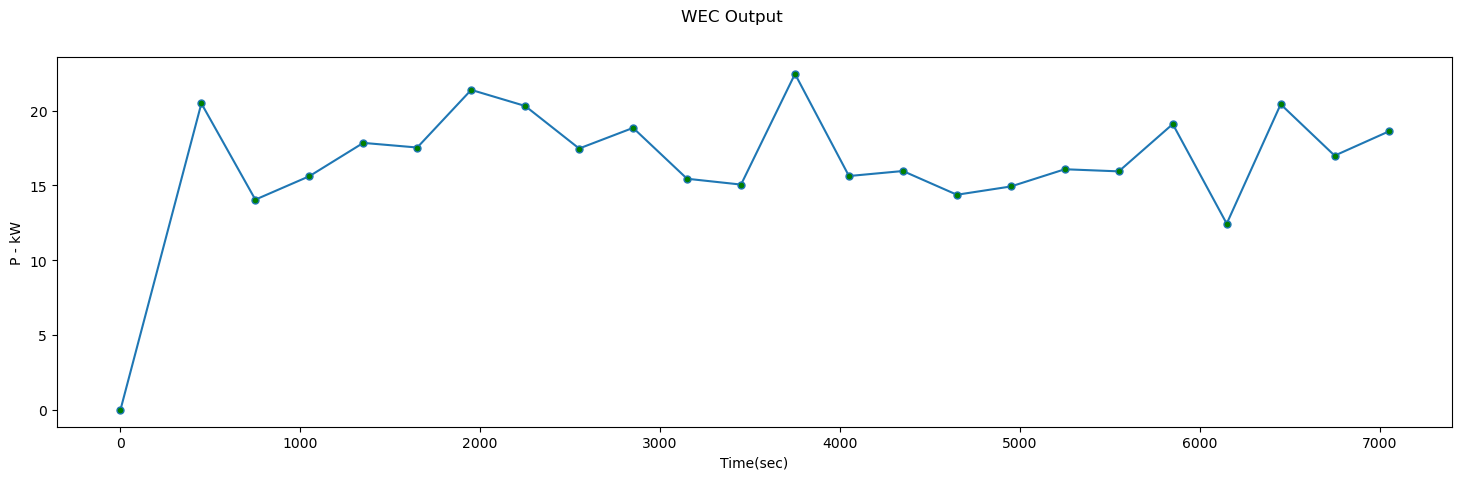

In [10]:
time = [450, (60 * 60 * 2)] # 2 hours
ylabel = "kW"
fig, (ax1) = plt.subplots()
fig.suptitle("WEC Output".format())
bus_df = wec_1.loc[(wec_1["time"] >= time[0]) & (wec_1["time"] <= time[1])]
ax1.plot(wec_1.time, wec_1["pg"], marker="o", markersize=5, markerfacecolor="green")
ax1.set(xlabel="Time(sec)", ylabel="P - {}".format(ylabel))
fig.set_figwidth(18)
plt.show()

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center> WEC Intergration </center></h2>

<p style="line-height:1.5">
<span style="font-family: Times">
<span style="font-size:16pt">
From the WEC output, we grab the P, V, and time stamp to preform our steady state intergration. In like 2 & 3 of the cell below we packages the values in bus order and call the python ac_injection() function in line 4. it's able to complete the entire 6 hour or 288 very quickly
</span> 
</span>
</p>

In [11]:
for i in range(len(wec_1)):
    p = [wec_1.iloc[i].pg, wec_2.iloc[i].pg, wec_3.iloc[i].pg]
    v = [wec_1.iloc[i].vs, wec_2.iloc[i].vs, wec_3.iloc[i].vs]
    WecObj._psse_ac_injection(p, v, 'fnsl', wec_1.iloc[i].time)
    print("========================")


 Power flow data changed for machine "1" at bus 21 [21          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    294.000         0.00000      PG

 Power flow data changed for bus 21 [21          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.911253         1.00000      VM

 Power flow data changed for machine "1" at bus 22 [22          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    150.000         0.00000      PG

 No power flow data changed for bus 22 [22          230.00]

 Power flow data changed for machine "1" at bus 23 [23          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    200.000         0.00000      PG

 Power flow data changed for bus 23 [23          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.849713         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         4.6851(     21     )   16.8855(     23     )
                                           

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center> Bus Charts </center></h2>

<p style="line-height:1.5">
<span style="font-family: Times">
<span style="font-size:16pt">
Using the built in bus plot function we can examine the bus behavior for any of the buses on the system. This can be very helpful for a grid operator trying to see if their system is reiable for the next few hours. 
</span> 
</span>
</p>

In [12]:
time = [450, (60 * 60 * 2)] # 2 hours

In [13]:
WecObj.psse_history[450]

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,138.0,1.000000,0.000000,3,608.303589,17.741732,NaN,NaN,608.303589,17.741732
1,2,BUS 2,138.0,0.996889,-0.194596,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000
2,3,BUS 3,138.0,0.910778,-13.358101,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000
3,4,BUS 4,138.0,0.902499,-12.007495,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001
4,5,BUS 5,138.0,0.934221,-9.086344,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000
5,6,BUS 6,138.0,0.946041,-15.123323,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000
6,7,BUS 7,138.0,0.839991,-21.009777,2,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000
7,8,BUS 8,230.0,0.848602,-21.268347,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000
8,9,BUS 9,138.0,0.884250,-17.740499,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000
9,10,BUS 10,138.0,0.912192,-15.373501,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000


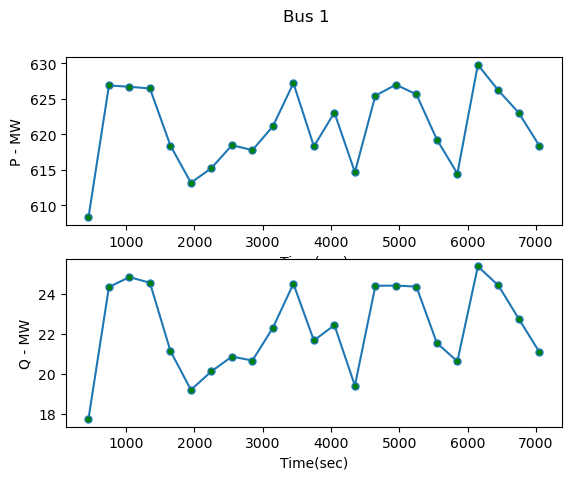

In [14]:
WecObj._psse_plot_bus(1, time)

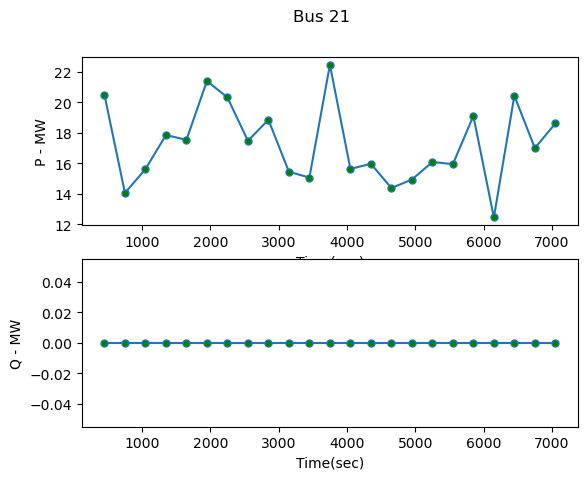

In [15]:
WecObj._psse_plot_bus(21, time)

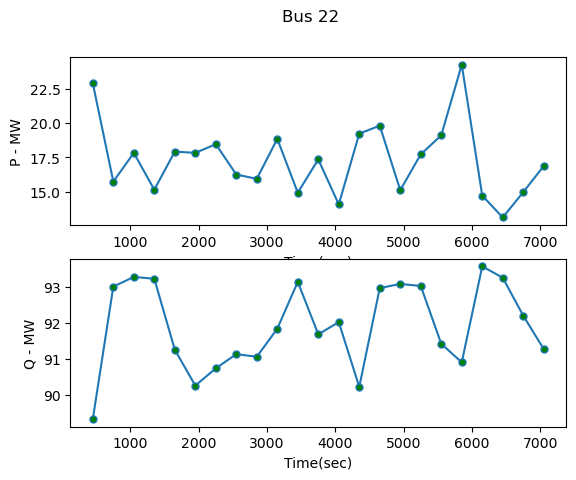

In [16]:
WecObj._psse_plot_bus(22, time)

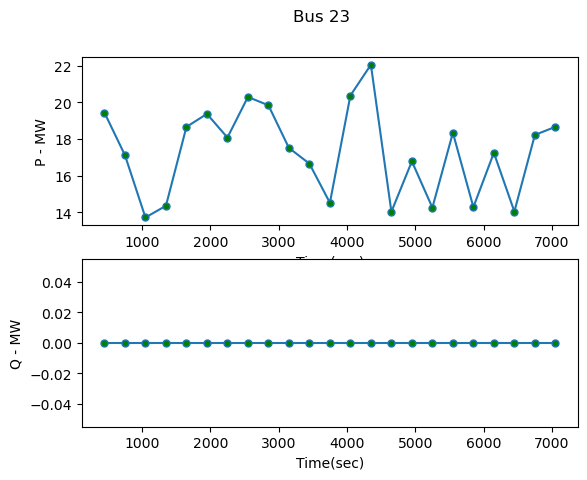

In [17]:
WecObj._psse_plot_bus(23, time)

<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center> Dynamics </center></h2>

<p style="line-height:1.5">
<span style="font-family: Times">
<span style="font-size:16pt">
Derek and I have our heads in the PSSe documentation right now figuring our how to build a .dyr for WECs. Were in the early stages on the research but ultimately would like to find a way to generate the file programmatically.
</span> 
</span>
</p>
    

In [18]:
case39 = "../input_files/ieee_39/IEEE 39 bus.RAW"
case39_dyr = r"../input_files/ieee_39/IEEE 39 bus.dyr"

In [27]:
WecObj = wg.Wec_grid(case39,[31, 32, 33])
WecObj.initalize_psse("fnsl")


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 39 records for Bus data
 Starting processing of Load data records
 Finished processing of 31 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 2 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 10 records for Generator data
 Starting processing of Branch data records
 Finished processing of 34 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 48 records for 12 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of 

In [28]:
WecObj.psse_dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,1.0,1.048980,-8.077874,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,2,BUS 2,1.0,1.052789,-5.495553,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,3,BUS 3,1.0,1.039262,-8.328973,1,NaN,NaN,322.000000,2.400000,-322.000000,-2.400000
3,4,BUS 4,1.0,1.022822,-9.236435,1,NaN,NaN,500.000000,184.000000,-500.000000,-184.000000
4,5,BUS 5,1.0,1.022406,-8.179247,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
5,6,BUS 6,1.0,1.019837,-7.494417,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
6,7,BUS 7,1.0,1.010302,-9.629506,1,NaN,NaN,233.800003,84.000000,-233.800003,-84.000000
7,8,BUS 8,1.0,1.009814,-10.116190,1,NaN,NaN,522.000000,176.000000,-522.000000,-176.000000
8,9,BUS 9,1.0,1.033909,-9.871022,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
9,10,BUS 10,1.0,1.026927,-5.080756,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000


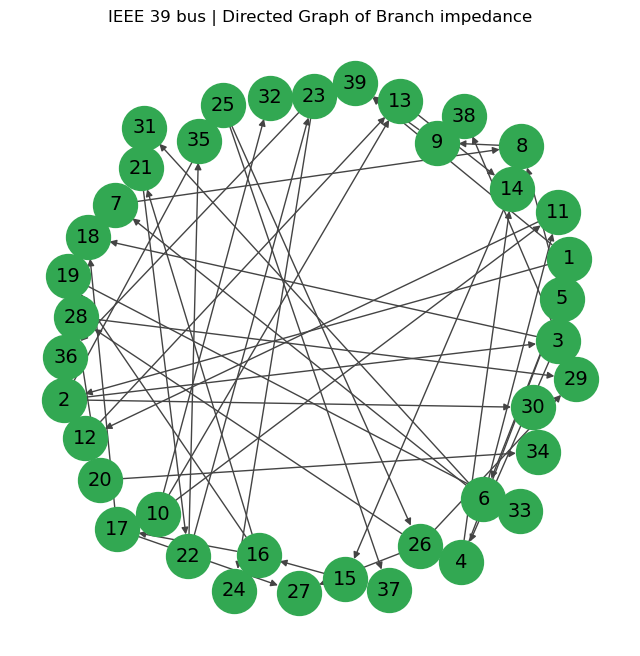

In [29]:
WecObj._psse_viz()

In [30]:
p = [wec_1.iloc[1].pg, wec_2.iloc[1].pg, wec_3.iloc[1].pg]
v = [wec_1.iloc[1].vs, wec_2.iloc[1].vs, wec_3.iloc[1].vs]
WecObj._psse_ac_injection(p, v, 'fnsl', wec_1.iloc[1].time)


 Power flow data changed for machine "1" at bus 31 [31          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    547.058         20.4836      PG

 Power flow data changed for bus 31 [31          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.982000         1.10000      VM

 Power flow data changed for machine "1" at bus 32 [32          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    650.000         22.8835      PG

 Power flow data changed for bus 32 [32          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.983000         1.10000      VM

 Power flow data changed for machine "1" at bus 33 [33          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    632.000         19.4330      PG

 Power flow data changed for bus 33 [33          1.0000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.997000         1.10000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         7.1710(    

In [31]:
WecObj.dynamic_case_file = case39_dyr

In [33]:
WecObj._psse_run_dynamics()


 31 loads converted during this step

 31 of 31 loads converted

 Generator conversion completed using ZSORCE
 Diagonals = 39   Off-diagonals = 67   Maximum size = 92

 39 diagonal and 67 off-diagonal elements

 ITER DELTAV/TOL X----------- AT BUS -----------X  REAL(DELTAV)  IMAG(DELTAV)
    1     0.020      20     [20          1.0000]    0.1597E-06   -0.1284E-06

 Reached tolerance in 1 iterations

 Largest mismatch:     -0.00 MW      0.00 Mvar      0.00 MVA at bus 19 [19          1.0000]
 System total absolute mismatch:                    0.00 MVA

 Case saved in file c:\Users\alexb\research\WEC-GRID\input_files\ieee_39\IEEE 39 bus.sav on WED, MAR 01 2023  19:51
 Out of file data--switch to terminal input mode

 Generator models use:
  CONS         1-    140
  STATES       1-     60

 Stabilizer models use:
  CONS       141-    310
  STATES      61-    130
  VARS         1-     20
  ICONS        1-     20


 SUMMARY OF MODELS READ:

 GENS:  GENROU
          10

 STABS: IEEEST
      

In [34]:
WecObj.psse_dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,1.0,1.048784,-32.094070,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,2,BUS 2,1.0,1.049270,-31.281256,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,3,BUS 3,1.0,1.027899,-34.228382,1,NaN,NaN,322.000000,2.400000,-322.000000,-2.400000
3,4,BUS 4,1.0,0.996569,-32.462635,1,NaN,NaN,500.000000,184.000000,-500.000000,-184.000000
4,5,BUS 5,1.0,0.987048,-27.981197,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
5,6,BUS 6,1.0,0.983442,-26.552223,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
6,7,BUS 7,1.0,0.975494,-29.311821,1,NaN,NaN,233.800003,84.000000,-233.800003,-84.000000
7,8,BUS 8,1.0,0.976149,-30.069960,1,NaN,NaN,522.000000,176.000000,-522.000000,-176.000000
8,9,BUS 9,1.0,1.019513,-31.624702,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000
9,10,BUS 10,1.0,1.002943,-29.158655,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000


<hr style="height:4px;border-width:0;color:black;background-color:black">

<h2><center> Future Work </center></h2>

<ul><font size="4"> 
  <li>Finish Dynamic (sliding window)</li>
  <li>Anylisis tools</li>
  <li>GUI</li>
  <li>MatPower</li>
   <li>MiGrids</li>
</ul>

<hr style="height:4px;border-width:0;color:black;background-color:black">